# Describe AR Model


## Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with ϕ=0.9, the array representing the AR parameters would be ar = np.array([1, -0.9])

### code

In [1]:
import matplotlib.pyplot as plt

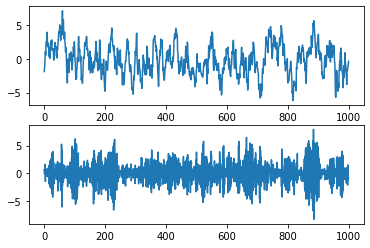

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, +.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

## Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)2=0.81, the third-lag will be (0.9)3=0.729, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)2=0.81, the third-lag will be (−0.9)3=−0.729, etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

### init

In [3]:
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

ar2 = np.array([1, +.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)

ar3 = np.array([1, -.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

### code

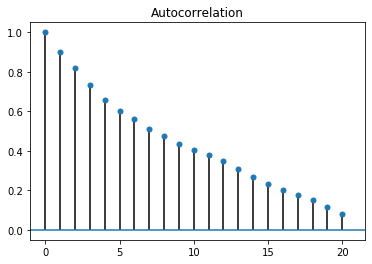

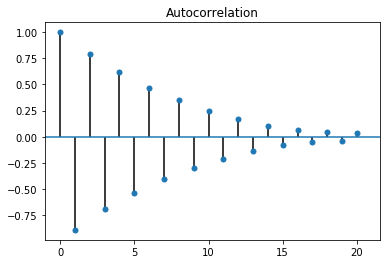

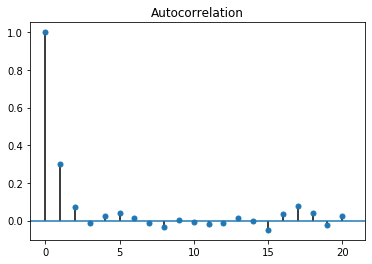

In [4]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

# Estimating and Forecasting AR Model


## Estimating an AR Model
You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true ϕ of 0.9, you will print out the estimate of ϕ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

### code

In [5]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1389.809
Method:                       css-mle   S.D. of innovations              0.970
Date:                Mon, 29 Jun 2020   AIC                           2785.618
Time:                        09:23:29   BIC                           2800.341
Sample:                             0   HQIC                          2791.214
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6813      0.307     -2.219      0.026      -1.283      -0.080
ar.L1.y        0.9009      0.014     66.160      0.000       0.874       0.928
                                    Roots           

## Forecasting with an AR Model
In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with ϕ=0.9, you will plot in-sample and out-of-sample forecasts.

### code

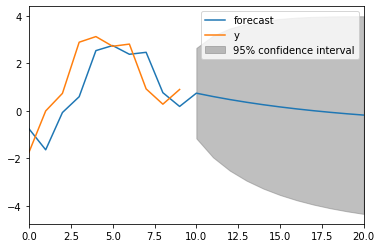

In [6]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

### init

In [7]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(interest_rate_data)
"""

tobedownloaded="""
{pandas.core.series.Series: {'interest_rate_data.csv': 'https://file.io/nPNegiF2'}}

"""
prefixToc='2.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
interest_rate_data = pd.read_csv(prefix+'interest_rate_data.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.series.Series': {'interest_rate_data.csv': 'https://file.io/nPNegiF2'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895    0   895    0     0    345      0 --:--:--  0:00:02 --:--:--   345



### code

C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


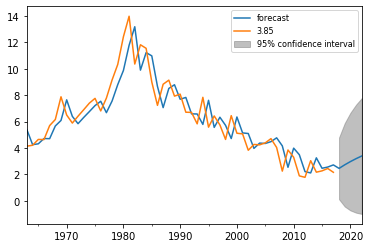

In [8]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

## Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

### init

In [11]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(interest_rate_data, simulated_data)
"""

tobedownloaded="""
{pandas.core.series.Series: {'interest_rate_data.csv': 'https://file.io/zu2p9djv'},
 numpy.ndarray: {'simulated_data.csv': 'https://file.io/1q48LQKx'}}
"""
prefixToc='2.4'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
interest_rate_data = pd.read_csv(prefix+'interest_rate_data.csv',index_col=0, header=None,squeeze=True)
from downloadfromFileIO import loadNDArrayFromCsv
simulated_data = loadNDArrayFromCsv(prefix+'simulated_data.csv')


Téléchargements à lancer
{'pandas.core.series.Series': {'interest_rate_data.csv': 'https://file.io/zu2p9djv'}, 'numpy.ndarray': {'simulated_data.csv': 'https://file.io/1q48LQKx'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895    0   895    0     0    315      0 --:--:--  0:00:02 --:--:--   315

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1005    0  1005    0     0   1580      0 --:--:-- --:--:-- --:--:--  1580



### code

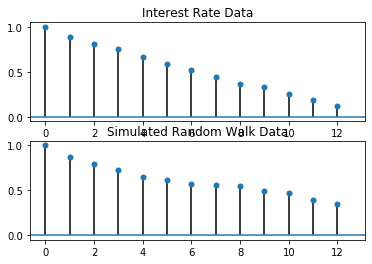

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

# Choosing the Right Model


## Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

### code

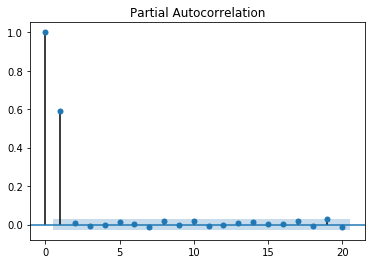

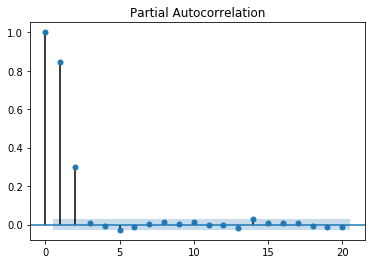

In [13]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

## Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

### code

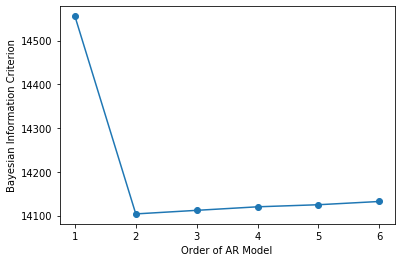

In [15]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()